# Figure 4.7, 4.8, 4.9, and 4.19A

Symmetric (bistable) biological networks.

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
using LinearAlgebra
Plots.gr(lw=2)

Plots.GRBackend()

In [2]:
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [3]:
# Model of symmetric network from Figure 4.6. This code generates Figures 4.7, 4.8, 4.9, and 4.19A

@parameters k_1 k_2 k_3 k_4 n_1 n_2
@variables t A(t) B(t)
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [4]:
eqs = [ D(A) ~ k_1 * hill(1, B, n_2) - k_3 * A,
        D(B) ~ k_2 * hill(1, A, n_1) - k_4 * B]
@named sys = ODESystem(eqs)

Model sys with 2 equations
States (2):
  A(t)
  B(t)
Parameters (6):
  k_3
  n_2
  k_1
  k_4
  k_2
  n_1

In [5]:
rhs = [x.rhs for x in collect(eqs)]
oop, iip = eval.(ModelingToolkit.build_function(rhs, [A, B], [k_1, k_2, k_3, k_4, n_1, n_2], t))

(var"#3#4"(), var"#5#6"())

In [6]:
params = Dict(k_1=>20.0, k_2=>20.0, k_3=>5.0, k_4=>5.0, n_1=>1.0, n_2=>4.0)

Dict{Num, Float64} with 6 entries:
  k_3 => 5.0
  k_4 => 5.0
  n_2 => 4.0
  k_2 => 20.0
  n_1 => 1.0
  k_1 => 20.0

In [7]:
function ∂F(x, y, params; scale=20)
	du = oop([x, y], params, 0.0)
	# Tweaking arrow length
	return du ./ (norm(du)^0.5 * scale)
end

∂F (generic function with 1 method)

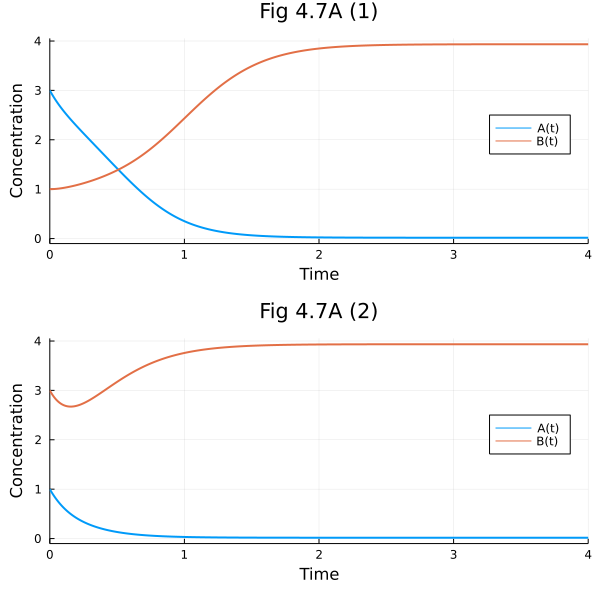

In [8]:
tend = 4.0
sol1 = solve(ODEProblem(sys, [A=>3.0, B=>1.0], tend, params))
sol2 = solve(ODEProblem(sys, [A=>1.0, B=>3.0], tend, params))

p1 = plot(sol1, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.7A (1)")
p2 = plot(sol2, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.7A (2)")
fig47a = plot(p1, p2, layout=(2, 1), size=(600, 600))

In [9]:
nullclineS1(B) = params[k_1] / params[k_3] * hill(1, B, params[n_2])
nullclineS2(A) = params[k_2] / params[k_4] * hill(1, A, params[n_1])

nullclineS2 (generic function with 1 method)

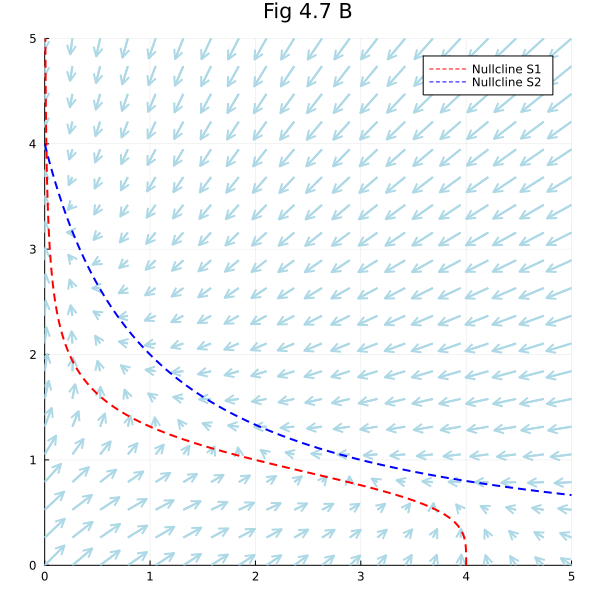

In [10]:
r = LinRange(0.0, 5.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

pl = quiver(xx, yy, quiver=(x,y)->∂F(x, y, [20, 20, 5, 5, 1, 4]), line=(:lightblue))

plot!(pl, nullclineS1, identity, 0.0, 5.0, lab="Nullcline S1", line=(:dash, :red))
plot!(pl, identity, nullclineS2, 0.0, 5.0, lab="Nullcline S2", line=(:dash, :blue))
plot!(pl, title="Fig 4.7 B", xlim=(0.0, 5.0), ylim=(0.0, 5.0), aspect_ratio = 1.0, size = (600, 600))

In [11]:
# Symmetric inhibition
params = Dict(k_1=>20.0, k_2=>20.0, k_3=>5.0, k_4=>5.0, n_1=>4.0, n_2=>4.0)

Dict{Num, Float64} with 6 entries:
  k_3 => 5.0
  k_4 => 5.0
  n_2 => 4.0
  k_2 => 20.0
  n_1 => 4.0
  k_1 => 20.0

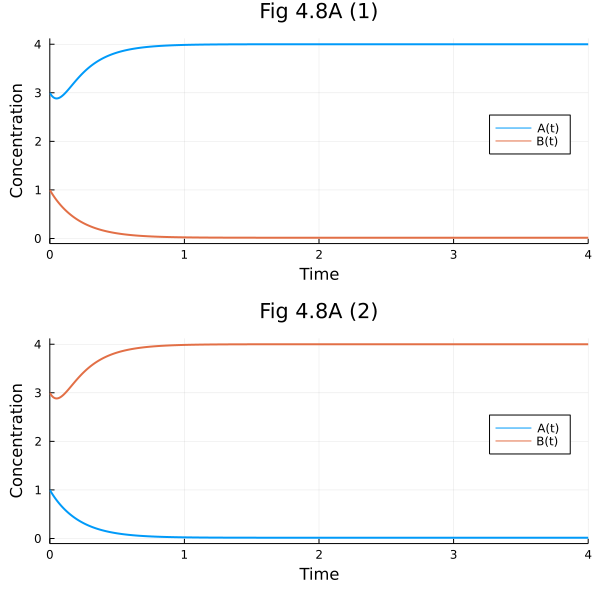

In [12]:
tend = 4.0
sol1 = solve(ODEProblem(sys, [A=>3.0, B=>1.0], tend, params))
sol2 = solve(ODEProblem(sys, [A=>1.0, B=>3.0], tend, params))

pl1 = plot(sol1, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.8A (1)")
pl2 = plot(sol2, xlabel="Time", ylabel="Concentration", legend=:right, title= "Fig 4.8A (2)")
fig48a = plot(pl1, pl2, layout=(2, 1), size=(600, 600))

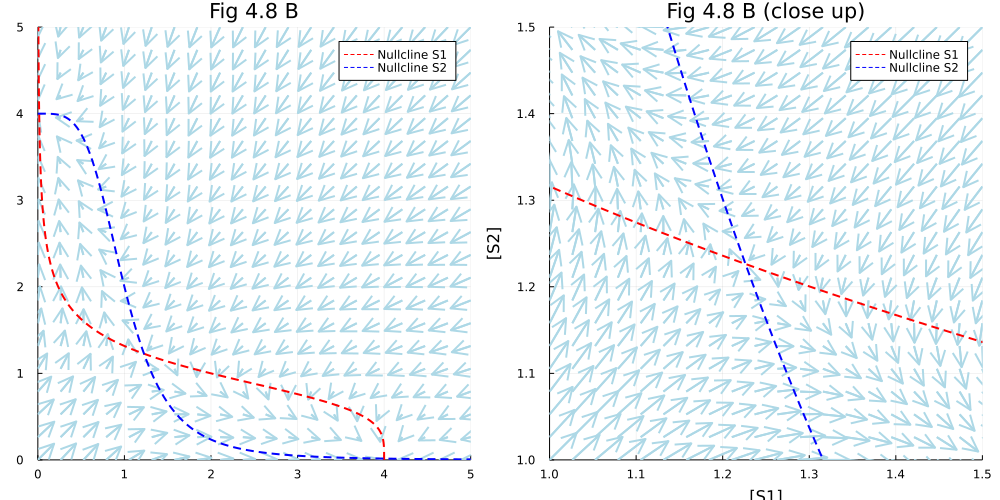

In [13]:
∂F2(x, y) = ∂F(x, y, [20, 20, 5, 5, 4, 4])

r = LinRange(0.0, 5.0, 20)
xx = [x for y in r, x in r]
yy = [y for y in r, x in r]

pl1 = quiver(xx, yy, quiver=∂F2, line=(:lightblue))
plot!(pl1, nullclineS1, identity, r[1], r[end], lab="Nullcline S1", line=(:dash, :red))
plot!(pl1, identity, nullclineS2, r[1], r[end], lab="Nullcline S2", line=(:dash, :blue))
plot!(pl1, title="Fig 4.8 B", xlim=(r[1], r[end]), ylim=(r[1], r[end]), aspect_ratio = :equal)

r2 = LinRange(1.0, 1.5, 20)
xx2 = [x for y in r2, x in r2]
yy2 = [y for y in r2, x in r2]

pl2 = quiver(xx2, yy2, quiver=(x, y) -> ∂F2(x,y) ./ 3, line=(:lightblue))
	
plot!(pl2, nullclineS1, identity, r2[1], r2[end], lab="Nullcline S1", line=(:dash, :red))
plot!(pl2, identity, nullclineS2, r2[1], r2[end], lab="Nullcline S2", line=(:dash, :blue))
plot!(pl2, title="Fig 4.8 B (close up)", xlim=(r2[1], r2[end]), ylim=(r2[1], r2[end]), aspect_ratio = :equal, xlabel="[S1]", ylabel="[S2]")

plot(pl1, pl2, size=(1000, 500))

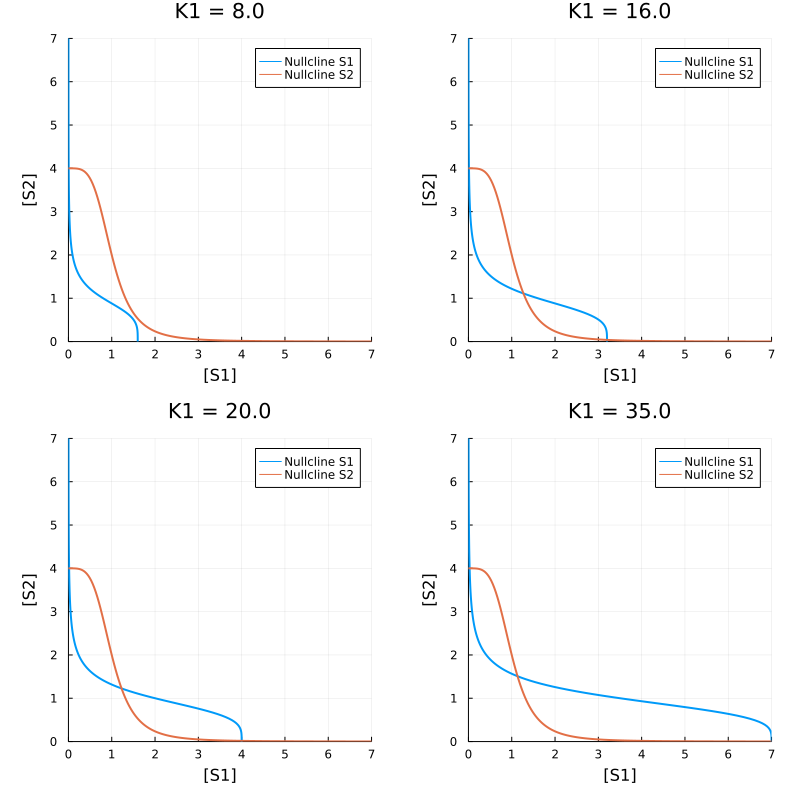

In [14]:
pls = map((8.0, 16.0, 20.0, 35.0)) do k1
    params[k_1] = k1
    plot(nullclineS1, identity, 0.0, 7.0, lab="Nullcline S1")
    plot!(identity, nullclineS2, 0.0, 7.0, lab="Nullcline S2")
    plot!(title = "K1 = $k1", xlim=(0.0, 7.0), ylim=(0.0, 7.0), 
      aspect_ratio = 1.0, size = (800, 800), xlabel="[S1]", ylabel="[S2]")
end

params[k_1] = 20

plot(pls...)